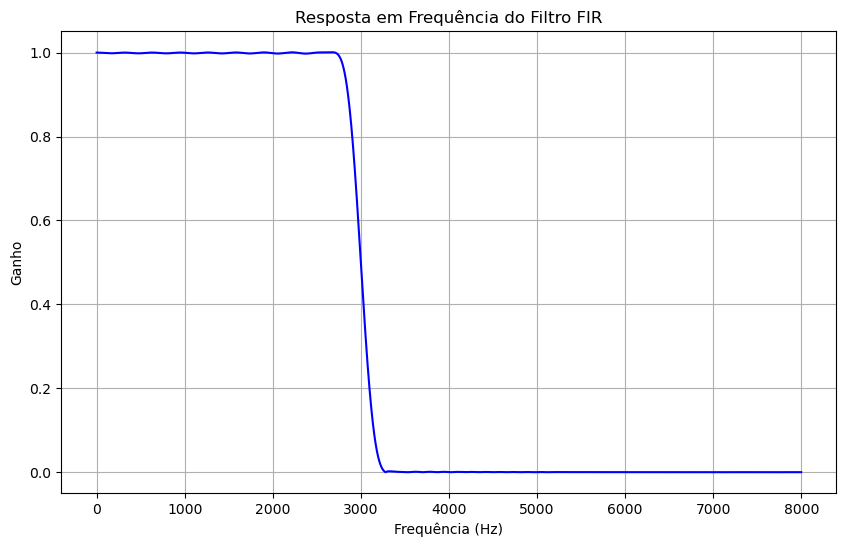

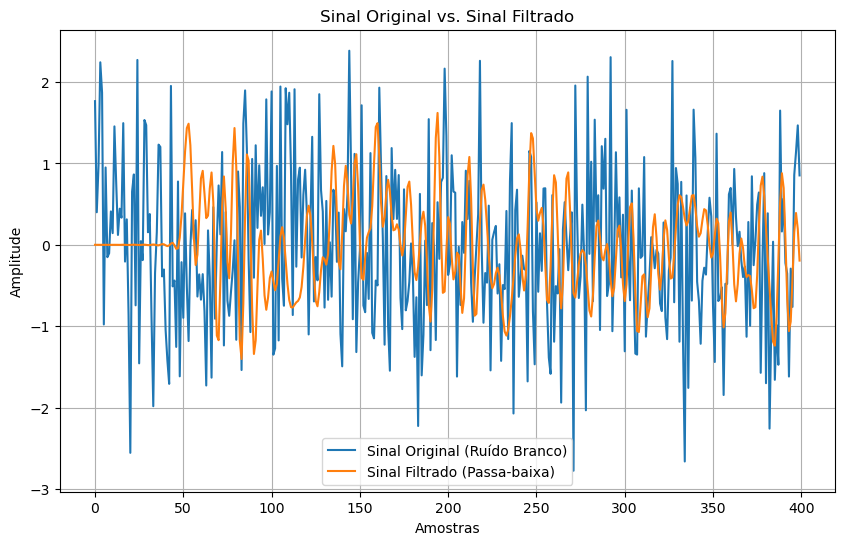

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

# Parâmetros do filtro FIR
sampling_rate = 16000  # Taxa de amostragem do sinal (exemplo 16 kHz)
nyquist_rate = sampling_rate / 2  # Frequência de Nyquist
cutoff_freq = 3000  # Frequência de corte do filtro (3 kHz)
num_taps = 101  # Número de coeficientes do filtro FIR (ordem do filtro)

# 1. Projetar o filtro FIR passa-baixa
fir_coefficients = firwin(num_taps, cutoff=cutoff_freq/nyquist_rate)

# 2. Exibir a resposta em frequência do filtro FIR
w, h = freqz(fir_coefficients, worN=8000)
plt.figure(figsize=(10, 6))
plt.plot(0.5*sampling_rate*w/np.pi, np.abs(h), 'b')
plt.title("Resposta em Frequência do Filtro FIR")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Ganho")
plt.grid()
plt.show()

# 3. Aplicar o filtro FIR a um sinal (sinal de exemplo: ruído branco)
np.random.seed(0)
n_samples = 400
signal = np.random.randn(n_samples)  # Sinal de entrada: ruído branco 

# Filtrar o sinal
filtered_signal = lfilter(fir_coefficients, 1.0, signal)

# 4. Visualizar o sinal original e o sinal filtrado
plt.figure(figsize=(10, 6))
plt.plot(signal, label="Sinal Original (Ruído Branco)")
plt.plot(filtered_signal, label="Sinal Filtrado (Passa-baixa)")
plt.title("Sinal Original vs. Sinal Filtrado")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()
